# Resale data in Singapore - EDA

This notebook analyses the Resale data in Singapore from 1990 to 2021

The machine learning models is in the other notebooks: Resale Prices with lat lon and Resale price prediction

All data is available from data.gov.sg

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime

## Preprocessing and cleaning

In [3]:
resale_1990_1999 =  pd.read_csv(
    'resale-flat-prices/resale-flat-prices-based-on-approval-date-1990-1999.csv',
                               parse_dates=True)
resale_2000_2012 = pd.read_csv(
    'resale-flat-prices/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv',
                               parse_dates=True)

resale_2012_2014 = pd.read_csv(
    'resale-flat-prices/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv',
                               parse_dates=True)
resale_2015_2016 = pd.read_csv(
    'resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv',
                               parse_dates=True)
resale_2017 = pd.read_csv(
    'resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv',
                               parse_dates=True)

In [4]:
#Combine 3 csv into one with concat
df = pd.concat([resale_1990_1999,resale_2000_2012,resale_2012_2014,resale_2015_2016,resale_2017],ignore_index = True)
# view headers
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [5]:
# View storey range
df['storey_range'].head()

0    10 TO 12
1    04 TO 06
2    10 TO 12
3    07 TO 09
4    04 TO 06
Name: storey_range, dtype: object

In [17]:
# split storey range into two columns with a low and high
df_storey =df['storey_range'].str.split(pat = " TO ", expand=True)
df_storey = df_storey.astype(int)
df_storey.head()

,0,1
0,10,12
1,4,6
2,10,12
3,7,9
4,4,6


In [18]:
storey_range= df_storey.mean(axis = 1)

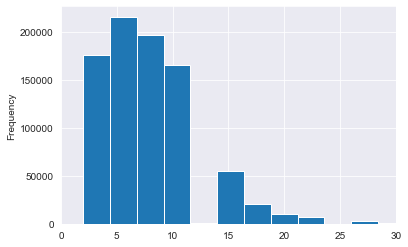

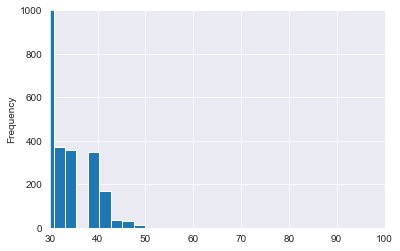

In [39]:
# reason for this plot is to show most of the flats being sold
storey_range.plot(kind= 'hist',xlim = (0,30),bins = 20)
plt.show()
storey_range.plot(kind = 'hist',xlim = (30,100) ,ylim = (0,1000), bins =20)
plt.show()

In [6]:
# Create target variable Dataframe
# Drop block, storey range and street name as irrelevant and difficult to work with
# Check .info() of features

price= df['resale_price']
features = df.drop(columns = ['block','storey_range','street_name'], axis = 1)
features = pd.concat([features,df_storeyrange],axis=1)
features = features.rename(columns={0: "Storey"})
features

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,Storey
0,1990-01,ANG MO KIO,1 ROOM,31.0,IMPROVED,1977,9000.0,NaN,11.0
1,1990-01,ANG MO KIO,1 ROOM,31.0,IMPROVED,1977,6000.0,NaN,5.0
2,1990-01,ANG MO KIO,1 ROOM,31.0,IMPROVED,1977,8000.0,NaN,11.0
3,1990-01,ANG MO KIO,1 ROOM,31.0,IMPROVED,1977,6000.0,NaN,8.0
4,1990-01,ANG MO KIO,3 ROOM,73.0,NEW GENERATION,1976,47200.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...
854246,2021-09,YISHUN,5 ROOM,113.0,Improved,2017,655000.0,95 years,11.0
854247,2021-09,YISHUN,5 ROOM,127.0,Improved,1988,620000.0,65 years 05 months,5.0
854248,2021-09,YISHUN,5 ROOM,122.0,Improved,1988,545000.0,65 years 08 months,5.0
854249,2021-09,YISHUN,EXECUTIVE,142.0,Apartment,1987,648000.0,64 years 08 months,11.0


In [7]:
features['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [8]:
features['flat_type'] = features['flat_type'].map({'MULTI GENERATION': 'MULTI-GENERATION'}).fillna(features['flat_type'])
features['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

In [9]:
# Convert objects to best possible dtypes
features = features.infer
features.dtypes

month                   string
town                    string
flat_type               string
floor_area_sqm         float64
flat_model              string
lease_commence_date      Int64
resale_price           float64
remaining_lease         object
Storey                   Int64
dtype: object

### Dealing with NaN values

Remaining_lease has many NaN values. Instead of dropping it or imputing, it can be estimated with the difference in month and lease commencement date. This is also based on the assumption that the lease is 99 years long. 

In [10]:
# Convert month and lease_commence_date to datetime 
features['lease_commence_dt']=pd.to_datetime(features['lease_commence_date'],format="%Y")
features['month'] = pd.to_datetime(features['month'],format="%Y-%m")
features.sample(5)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,Storey,lease_commence_dt
560246,2008-10-01,JURONG WEST,4 ROOM,107.0,Model A,1984,265000.0,NaN,5,1984-01-01
829777,2020-11-01,HOUGANG,3 ROOM,67.0,New Generation,1985,283000.0,64 years 01 month,5,1985-01-01
289206,2000-01-01,TOA PAYOH,4 ROOM,82.0,Improved,1975,258000.0,NaN,17,1975-01-01
652100,2011-12-01,ANG MO KIO,3 ROOM,67.0,New Generation,1979,344000.0,NaN,14,1979-01-01
26856,1992-02-01,BUKIT MERAH,1 ROOM,29.0,IMPROVED,1969,9500.0,NaN,5,1969-01-01


In [11]:
# Create new col remaining_lease_dt which is the difference between month and lease_commence_date
features['current_lease_dt']=features['month']-features['lease_commence_dt']
features['current_lease_year'] = features['current_lease_dt'] / np.timedelta64(1, 'Y')
features['remaining_lease_year'] = 99-features['current_lease_year']

In [12]:
#Check if the values are similar
features.tail()

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,Storey,lease_commence_dt,current_lease_dt,current_lease_year,remaining_lease_year
854246,2021-09-01,YISHUN,5 ROOM,113.0,Improved,2017,655000.0,95 years,11,2017-01-01,1704 days,4.665394,94.334606
854247,2021-09-01,YISHUN,5 ROOM,127.0,Improved,1988,620000.0,65 years 05 months,5,1988-01-01,12297 days,33.668042,65.331958
854248,2021-09-01,YISHUN,5 ROOM,122.0,Improved,1988,545000.0,65 years 08 months,5,1988-01-01,12297 days,33.668042,65.331958
854249,2021-09-01,YISHUN,EXECUTIVE,142.0,Apartment,1987,648000.0,64 years 08 months,11,1987-01-01,12662 days,34.667379,64.332621
854250,2021-09-01,YISHUN,EXECUTIVE,142.0,Apartment,1988,732000.0,65 years 05 months,8,1988-01-01,12297 days,33.668042,65.331958


In [13]:
features = features.drop(columns = ['remaining_lease','current_lease_year','current_lease_dt']
                         ,axis=1)
features

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,Storey,lease_commence_dt,remaining_lease_year
0,1990-01-01,ANG MO KIO,1 ROOM,31.0,IMPROVED,1977,9000.0,11,1977-01-01,86.000418
1,1990-01-01,ANG MO KIO,1 ROOM,31.0,IMPROVED,1977,6000.0,5,1977-01-01,86.000418
2,1990-01-01,ANG MO KIO,1 ROOM,31.0,IMPROVED,1977,8000.0,11,1977-01-01,86.000418
3,1990-01-01,ANG MO KIO,1 ROOM,31.0,IMPROVED,1977,6000.0,8,1977-01-01,86.000418
4,1990-01-01,ANG MO KIO,3 ROOM,73.0,NEW GENERATION,1976,47200.0,5,1976-01-01,84.998344
...,...,...,...,...,...,...,...,...,...,...
854246,2021-09-01,YISHUN,5 ROOM,113.0,Improved,2017,655000.0,11,2017-01-01,94.334606
854247,2021-09-01,YISHUN,5 ROOM,127.0,Improved,1988,620000.0,5,1988-01-01,65.331958
854248,2021-09-01,YISHUN,5 ROOM,122.0,Improved,1988,545000.0,5,1988-01-01,65.331958
854249,2021-09-01,YISHUN,EXECUTIVE,142.0,Apartment,1987,648000.0,11,1987-01-01,64.332621


In [14]:
features.sample(5)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,Storey,lease_commence_dt,remaining_lease_year
509473,2006-11-01,TOA PAYOH,3 ROOM,67.0,Standard,1969,170000.0,2,1969-01-01,61.167601
675759,2012-12-01,CHOA CHU KANG,5 ROOM,110.0,Improved,2002,485000.0,5,2002-01-01,88.083965
604779,2010-03-01,WOODLANDS,5 ROOM,128.0,Premium Apartment,1999,414000.0,11,1999-01-01,87.837553
480614,2005-11-01,HOUGANG,3 ROOM,73.0,New Generation,1978,175000.0,8,1978-01-01,71.166437
50491,1993-09-01,JURONG EAST,4 ROOM,95.0,NEW GENERATION,1983,131500.0,2,1983-01-01,88.333114


## Data analysis

## Annual trend in number of resales

In [15]:
count = features.resample('A', on='month').agg({'town':'count'})
count = count.rename(columns={"town":"No of Resales"})
count.head()

,No of Resales
month,
1990-12-31,12505
1991-12-31,12855
1992-12-31,14503
1993-12-31,18116
1994-12-31,26373


<AxesSubplot:xlabel='month', ylabel='No of Resales'>

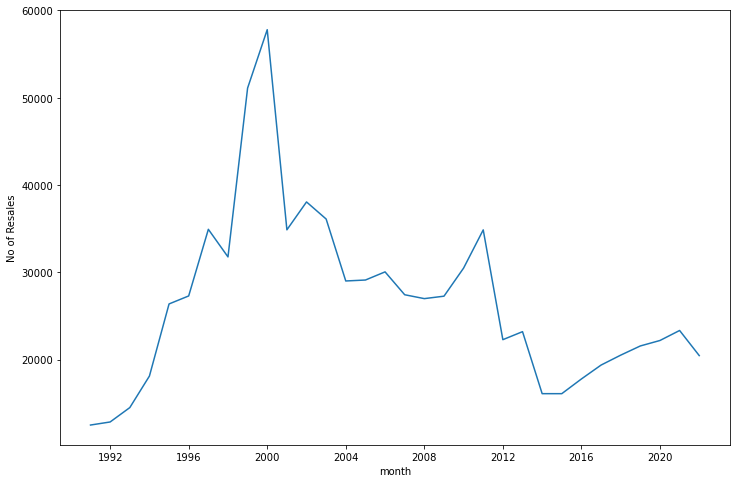

In [16]:
plt.figure(figsize = (12,8))
sns.lineplot(data=count,x='month',y='No of Resales')

## Average cost of housing from 1990 to 2021

In [17]:
avg = features.resample('A', on='month').agg({'resale_price':np.mean})
avg = avg.rename(columns={"town":"Avg Resale Prices"})
avg.head()

,resale_price
month,
1990-12-31,68086.142263
1991-12-31,73588.938934
1992-12-31,84372.635731
1993-12-31,132807.719750
1994-12-31,172619.529936


<AxesSubplot:xlabel='month', ylabel='resale_price'>

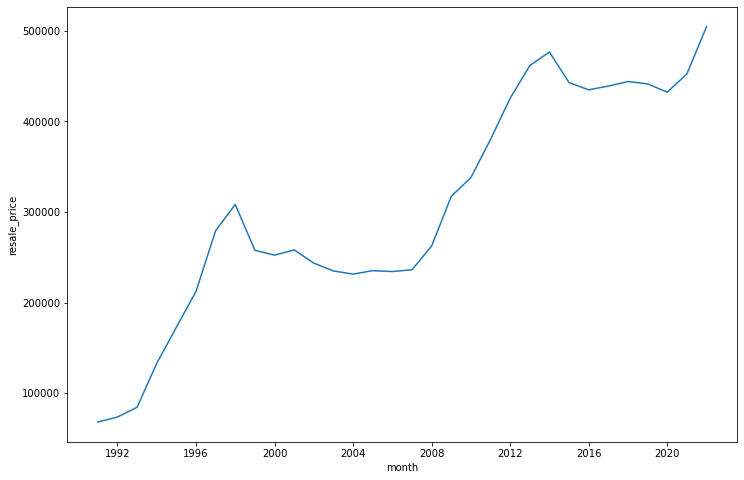

In [18]:
plt.figure(figsize = (12,8))
sns.lineplot(data=avg,x='month',y='resale_price')

## Top 5 locations with resale flats since 1990

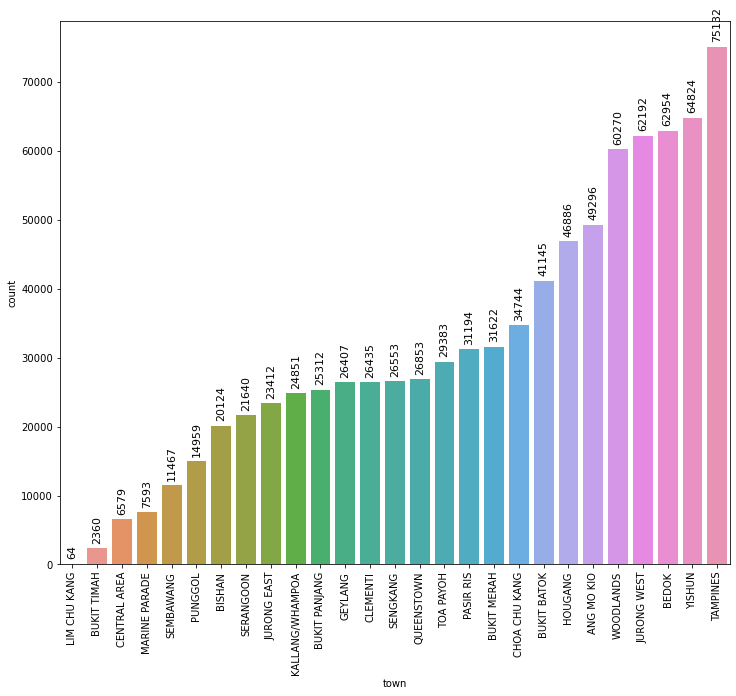

In [19]:
plt.figure(figsize = (12,10))
graph = sns.countplot(data=features,
                      x='town',
                      order=features['town'].value_counts(ascending=True).index)
plt.xticks(rotation=90)
for p in graph.patches:
    graph.annotate(format(p.get_height()), (p.get_x()+0.2, p.get_height()+1000),
                  rotation=90,
                  fontsize=11)

## Histogram plot of remaining lease

From the plot we can see most of the houses sold were right after the Minumum occupancy period of 5 years.

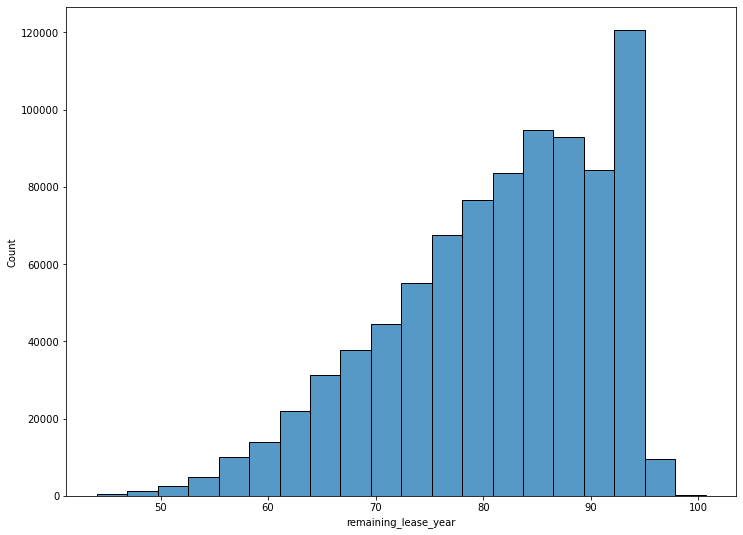

In [20]:
plt.figure(figsize = (12,9))
graph = sns.histplot(data=features,
                    x='remaining_lease_year',
                    bins=20)

### Top 5 flat types

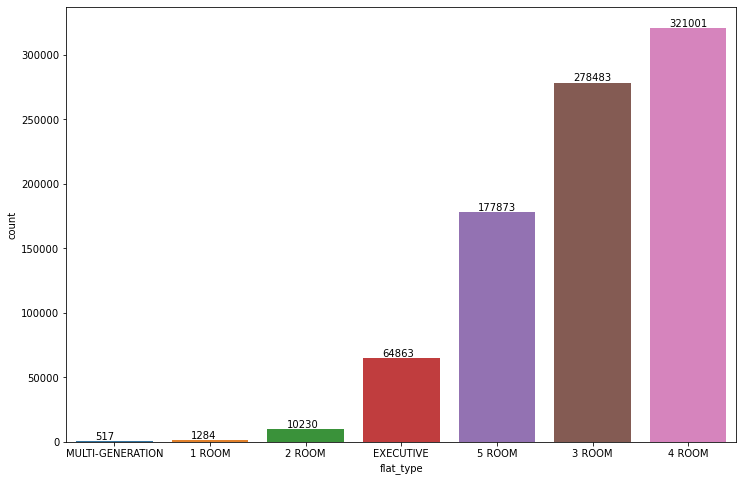

In [21]:
plt.figure(figsize = (12,8))
graph = sns.countplot(data=features,
                      x='flat_type',
                      order=features['flat_type'].value_counts(ascending=True).index)
for p in graph.patches:
    graph.annotate(format(p.get_height()), (p.get_x()+0.2, p.get_height()+1000))

## Trend of resales right after MOP. 

I use the value 93 to filter out remaining leases below 93. The assumption of 2 years is for searching of buyers and the time required to process the transaction. 

In [22]:
mop_resale = features[features['remaining_lease_year']>93]
mop_resale.shape # Show number of total resales with lease above 93

(102375, 10)

In [23]:
mop_resale = mop_resale.resample('A', on='month').agg({'town':'count'})

In [24]:
mop_resale.sort_values(by='town',ascending=False).head(5) # Resample to annual and sum it up

,town
month,
2001-12-31,9861
1999-12-31,8816
2002-12-31,8677
2000-12-31,6847
1998-12-31,6281


<AxesSubplot:xlabel='month', ylabel='town'>

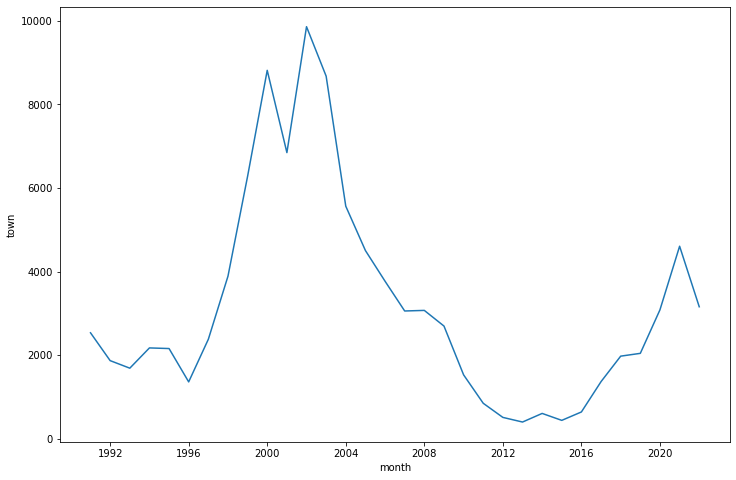

In [25]:
plt.figure(figsize = (12,8))
sns.lineplot(data=mop_resale,x='month',y='town')

From the above graph and data, the top 5 sales in MOP occured in 1998-2002 inclusive. After decreasing from 2001 till 2015, it begun to rise again. More data is needed to see if the trend is continuing. 

## Flat by age

In [35]:
features['age'] = 2021-features['lease_commence_date']
features['age'] # Current year - commence date

0         44
1         44
2         44
3         44
4         45
          ..
854246     4
854247    33
854248    33
854249    34
854250    33
Name: age, Length: 854251, dtype: Int64

### hist plot of all flat age

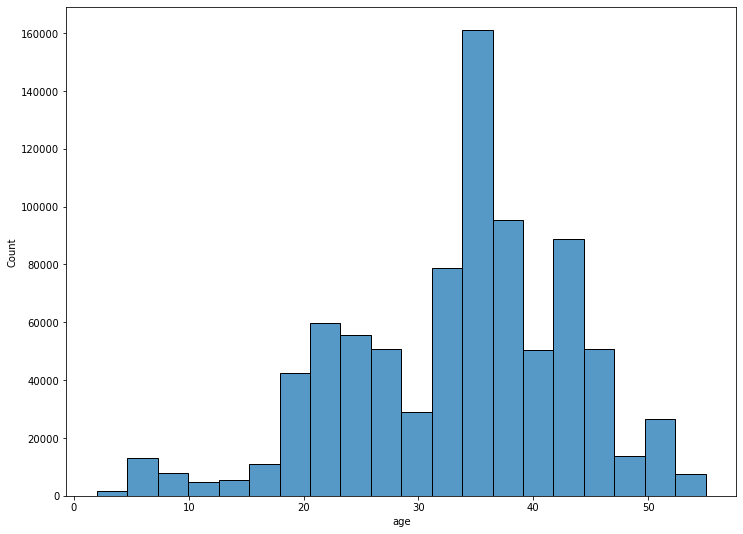

In [27]:
plt.figure(figsize = (12,9))
graph = sns.histplot(data=features,
                    x='age',
                    bins=20)

### Age by town

In [32]:
avg_town_age= features.groupby('town')['age'].median()
avg_town_age = avg_town_age.to_frame()
avg_town_age.sort_values(by='age',ascending=False).head(5)

,age
town,
QUEENSTOWN,47
TOA PAYOH,46
MARINE PARADE,46
BUKIT MERAH,43
CLEMENTI,42


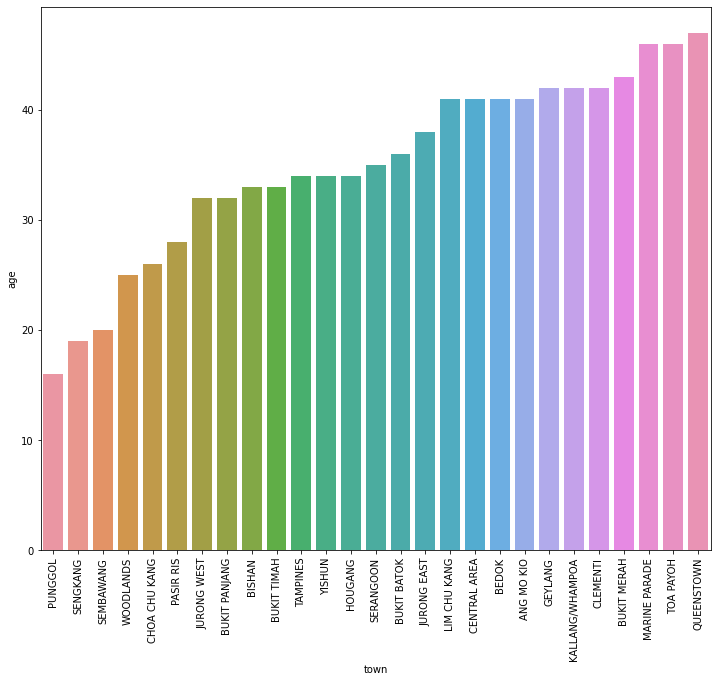

In [34]:
plt.figure(figsize = (12,10))
sns.barplot(data=avg_town_age,
            x=avg_town_age.index,
            y ='age',
            order=avg_town_age.sort_values(by='age',ascending=True).index)
plt.xticks(rotation=90)
plt.show()

## Build new Dataframe to analyse data by town from 2012 onwards

Reason is due to the rising prices from 1990 that will skew the data. 

In [36]:
features2 = features[features.month>='2010-01-01']
features2

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,Storey,lease_commence_dt,remaining_lease_year,age
596524,2010-01-01,ANG MO KIO,2 ROOM,44.0,Improved,1977,202000.0,11,1977-01-01,66.000007,44
596525,2010-01-01,ANG MO KIO,2 ROOM,44.0,Improved,1978,208000.0,2,1978-01-01,66.999343,43
596526,2010-01-01,ANG MO KIO,2 ROOM,44.0,Improved,1978,180000.0,8,1978-01-01,66.999343,43
596527,2010-01-01,ANG MO KIO,2 ROOM,44.0,Improved,1978,180000.0,8,1978-01-01,66.999343,43
596528,2010-01-01,ANG MO KIO,2 ROOM,44.0,Improved,1977,198000.0,2,1977-01-01,66.000007,44
...,...,...,...,...,...,...,...,...,...,...,...
854246,2021-09-01,YISHUN,5 ROOM,113.0,Improved,2017,655000.0,11,2017-01-01,94.334606,4
854247,2021-09-01,YISHUN,5 ROOM,127.0,Improved,1988,620000.0,5,1988-01-01,65.331958,33
854248,2021-09-01,YISHUN,5 ROOM,122.0,Improved,1988,545000.0,5,1988-01-01,65.331958,33
854249,2021-09-01,YISHUN,EXECUTIVE,142.0,Apartment,1987,648000.0,11,1987-01-01,64.332621,34


In [37]:
avg_town= features2.groupby('town')['resale_price'].mean()
avg_town = avg_town.to_frame()
avg_town = avg_town.rename(columns={"resale_price": "Avg Resale"})
avg_town = avg_town.round(0)
avg_town.sort_values(by = 'Avg Resale', ascending=False).head(5)

,Avg Resale
town,
BUKIT TIMAH,668037.0
BISHAN,592654.0
CENTRAL AREA,570714.0
BUKIT MERAH,540824.0
QUEENSTOWN,523074.0


In [38]:
med_town= features2.groupby('town')['resale_price'].median()
med_town = med_town.to_frame()
med_town = med_town.rename(columns={"resale_price": "Med Resale"})
med_town = med_town.round(0)
med_town.sort_values(by = 'Med Resale', ascending=False).head(5)

,Med Resale
town,
BUKIT TIMAH,668000.0
BISHAN,570000.0
BUKIT MERAH,543500.0
PASIR RIS,475000.0
CENTRAL AREA,471000.0


In [39]:
count_town= features2.groupby('town')['resale_price'].count()
count_town = count_town.to_frame()
count_town = count_town.rename(columns={"resale_price": "Count Resale"})
count_town = count_town.round(0)
count_town.sort_values(by = 'Count Resale', ascending=False).head(5)

,Count Resale
town,
WOODLANDS,20160
JURONG WEST,19796
SENGKANG,18217
TAMPINES,17897
YISHUN,16710


In [40]:
## List of oldest towns from 2012

In [41]:
town_df = avg_town.merge(med_town, on='town').merge(count_town,on='town').merge(Age_town,on='town')
town_df.sort_values(by='Remaining Lease', ascending=False).head(10)

NameError: name 'Age_town' is not defined

### Highest price based on flat type and flat model, followed by average thereafter

In [ ]:
max_features =features2.groupby(['flat_type','flat_model'])['resale_price'].max()
df_max= max_features.to_frame()
df_max = df_max.round(0)
df_max.sort_values(by = 'resale_price', ascending=False).head(10)

In [ ]:
# Shows the mean price based on flat type and flat model
mean_features =features2.groupby(['flat_type','flat_model'])['resale_price'].mean()
df_mean= mean_features.to_frame()
df_mean = df_mean.round(0)
df_mean.sort_values(by = 'resale_price', ascending=False).head(10)